In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/home/siva/Downloads/py-master/ML/7_logistic_reg/Exercise/HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### I am going to do one hot encoding to these department values


In [8]:
ohe=OneHotEncoder()
encoded_columns=ohe.fit_transform(df[['Department']])
encoded_columns

<14999x10 sparse matrix of type '<class 'numpy.float64'>'
	with 14999 stored elements in Compressed Sparse Row format>

In [12]:
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [16]:
df_encoded=pd.DataFrame(encoded_columns.toarray(),\
                        columns=ohe.get_feature_names_out(['Department']))
df_encoded

,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
14994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
df2=pd.concat([df,df_encoded],axis=1)
df2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14995,0.37,0.48,2,160,3,0,1,0,support,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14996,0.37,0.53,2,143,3,0,1,0,support,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14997,0.11,0.96,6,280,4,0,1,0,support,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
df2.drop(['Department_IT','Department'],axis=1,inplace=True)
df2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,medium,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,medium,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14995,0.37,0.48,2,160,3,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14996,0.37,0.53,2,143,3,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14997,0.11,0.96,6,280,4,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
ordinal_order=df['salary'].unique()
ordinal_order

array(['low', 'medium', 'high'], dtype=object)

In [45]:
mapping={category:index for index,category in \
         enumerate(ordinal_order)}
df2['salary_encoded']=df['salary'].map(mapping)
df2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary,salary_encoded
0,0.38,0.53,0.0,0.285047,0.125,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,low,0
1,0.80,0.86,0.6,0.775701,0.500,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,medium,1
2,0.11,0.88,1.0,0.822430,0.250,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,medium,1
3,0.72,0.87,0.6,0.593458,0.375,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,low,0
4,0.37,0.52,0.0,0.294393,0.125,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,low,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,0.0,0.257009,0.125,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,low,0
14995,0.37,0.48,0.0,0.299065,0.125,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,low,0
14996,0.37,0.53,0.0,0.219626,0.125,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,low,0
14997,0.11,0.96,0.8,0.859813,0.250,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,low,0


## Feature Scaling

In this section i am going to use min max scaler as the number has to lie between 0 and 1

In [33]:
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(df2[['number_project', \
            'average_montly_hours','time_spend_company']])
df2[['number_project','average_montly_hours'\
     ,'time_spend_company']]=scaled_data
df2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_encoded
0,0.38,0.53,0.0,0.285047,0.125,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.80,0.86,0.6,0.775701,0.500,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,0.11,0.88,1.0,0.822430,0.250,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,0.72,0.87,0.6,0.593458,0.375,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.37,0.52,0.0,0.294393,0.125,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,0.0,0.257009,0.125,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
14995,0.37,0.48,0.0,0.299065,0.125,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
14996,0.37,0.53,0.0,0.219626,0.125,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
14997,0.11,0.96,0.8,0.859813,0.250,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


## EDA

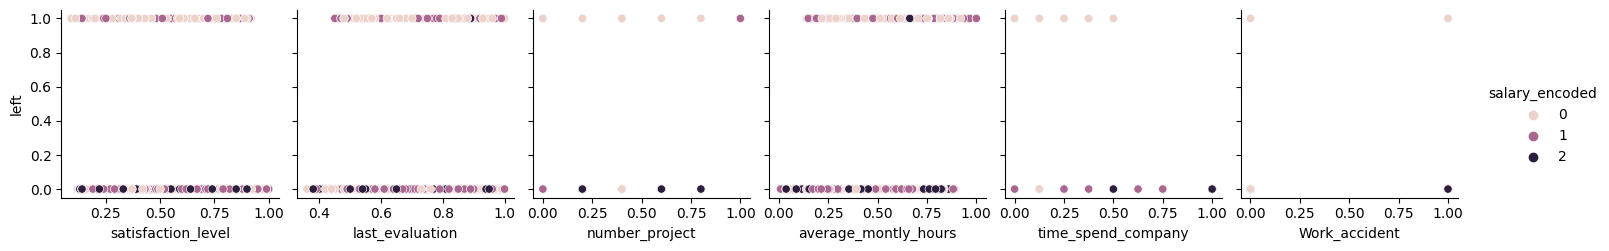

In [46]:
sns.pairplot(data=df2,x_vars=['satisfaction_level',\
    'last_evaluation','number_project','average_montly_hours',\
    'time_spend_company','Work_accident'],y_vars=['left'],\
             hue='salary_encoded')

In [78]:
df.groupby('left').mean()

TypeError: Could not convert salessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmarketingmarketingmarketingmarketingmarketingmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmarketingaccountingaccountingITITmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmarketingaccountingaccountingITITmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmarketingaccountingaccountingITITmanagementsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmarketingaccountingaccountingITITmanagementsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmarketingaccountingaccountingITITmanagementsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalestechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalestechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalestechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITITITITITITITmarketingaccountingaccountingITITmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITITmanagementmanagementmanagementmanagementmanagementmarketingITtechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalestechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalestechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalestechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITITITITITITITmarketingaccountingaccountingITITmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITITmanagementmanagementmanagementmanagementmanagementmarketingIT to numeric

In [71]:
X=df2[['salary_encoded',]]
y=df2['left']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)
X_train

,salary_encoded,promotion_last_5years
13140,0,0
2584,0,0
7012,2,0
9580,1,0
5,0,0
...,...,...
6629,0,0
10597,1,0
6626,0,0
4255,2,0


In [72]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [73]:
model.score(X_test,y_test)

0.7573333333333333

# Addition of any other feature doesnt have a significant effect on the accuracy of the model
